In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# โหลดข้อมูล

In [5]:
df = pd.read_csv('datasets/salary_food.csv')
df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


# ตรวจสอบการกระจายข้อมูล

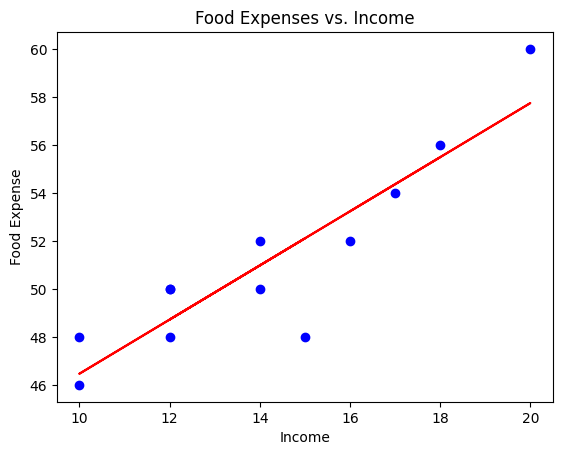

In [9]:
plt.scatter(df['income'],df['food_expenses'],color='blue')

# หาความชัน (Slope)
m,b = np.polyfit(df['income'],df['food_expenses'],1)

# สร้างเส้นตรง
plt.plot(df['income'],m*df['income']+b, color='red')
plt.title('Food Expenses vs. Income')
plt.xlabel('Income')
plt.ylabel('Food Expense')
plt.show()

# แบ่งข้อมูล Train Test

In [11]:
# x,y  for simple linear regression
x = df[['income']]
y = df['food_expenses']

# แบ่งข้อมูลเป็น train กับ test

x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)


[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[52 60 50 52 50 48 48 46 48 50]
[[17]
 [18]]
[54 56]


# การ train model

In [12]:
# สร้าง model object linear regression
model = LinearRegression()

# สอนโมเดล (fit the model)
model.fit(x_train,y_train)

LinearRegression()

# การทำนายผล Prediction

In [13]:
#ตัวอย่างทำนายผล
print("Prediction : ",model.predict(x_test))

Prediction :  [54.3030303  55.41818182]


# การประเมินผล Model (Model Evaluation)

In [15]:
# ดูค่า Coefficient และค่า intercept
print("Coefficient :", model.coef_)
print("Intercept", model.intercept_)

Coefficient : [1.11515152]
Intercept 35.345454545454544


In [21]:
# ดูความแม่นยำ Model ด้วย R-Square
print("R-Square", model.score(x_test,y_test))
print("ค่าความแม่นยำ %.2f%%" % (model.score(x_test,y_test)*100))

R-Square 0.7848301193755732
ค่าความแม่นยำ 78.48%


# Export Model

In [23]:
# ติดตั้ง Library Export Model

!pip install joblib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from joblib import dump

dump(model, 'Salary_food_model.joblib')

['Salary_food_model.joblib']

# Load Model มาใช้

In [28]:
from joblib import load

# โหลด Model จาก file
myModel = load('Salary_food_model.joblib')

#ทดสอบการทำนาย
print("Prediction : ",myModel.predict([[17],[18],[30],[60]]))

print("ค่าความแม่นยำ %.2f%%" % (myModel.score(x_test,y_test)*100))

Prediction :  [ 54.3030303   55.41818182  68.8        102.25454545]
ค่าความแม่นยำ 78.48%
